# cnn 연습문제
## import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, Dropout

Using TensorFlow backend.


## train data 생성

In [2]:
def img_path(shape, i):
    return f'data/train/{shape}/{shape+str(i).zfill(3)}.png'

cir = np.array([cv2.imread(img_path('circle', i), 0)
                for i in range(1,16)])

rec = np.array([cv2.imread(img_path('rectangle', i), 0)
                for i in range(1,16)])

tri = np.array([cv2.imread(img_path('triangle', i), 0)
                for i in range(1,16)])

train_x = np.concatenate([cir, rec, tri]).reshape(-1, 24, 24, 1)
train_y = np.array([i//15 for i in range(45)])
train_y = to_categorical(train_y)

## model 생성

In [3]:
model = Sequential()

model.add(Conv2D(input_shape = (train_x.shape[1], train_x.shape[2], train_x.shape[3]), filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(3, activation = 'softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

## train history 보기

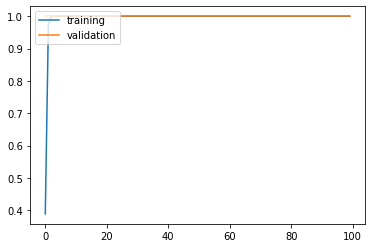

In [4]:
history = model.fit(train_x, train_y, batch_size = 45, validation_split = 0.2, epochs = 100, verbose = 0)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

## easy test 데이터 셋 검증

In [5]:
def img_path(shape, i):
    return f'data/test_easy/{shape}/{shape+str(i).zfill(3)}.png'

t_cir = np.array([cv2.imread(img_path('circle', i), 0)
                  for i in range(16,21)]).reshape(-1, 24, 24, 1)

t_rec = np.array([cv2.imread(img_path('rectangle', i), 0)
                  for i in range(16,21)]).reshape(-1, 24, 24, 1)

t_tri = np.array([cv2.imread(img_path('triangle', i), 0)
                  for i in range(16,21)]).reshape(-1, 24, 24, 1)

test_x = np.concatenate([t_cir, t_rec, t_tri])
test_y = np.array([i//5 for i in range(15)])
test_y = to_categorical(test_y)

results = model.evaluate(test_x, test_y)
print('Test accuracy: ', results[1])

15/15 [==============================] - 0s 533us/step
Test accuracy:  0.9333333373069763


## normal 데이터 셋 검증

In [6]:
def img_path(shape, i):
    return f'data/test/{shape}/{shape+str(i).zfill(3)}.png'

t_cir = np.array([cv2.imread(img_path('circle', i), 0)
                  for i in range(21,26)]).reshape(-1, 24, 24, 1)

t_rec = np.array([cv2.imread(img_path('rectangle', i), 0)
                  for i in range(21,26)]).reshape(-1, 24, 24, 1)

t_tri = np.array([cv2.imread(img_path('triangle', i), 0)
                  for i in range(21,26)]).reshape(-1, 24, 24, 1)

test_x = np.concatenate([t_cir, t_rec, t_tri])
test_y = np.array([i//5 for i in range(15)])
test_y = to_categorical(test_y)

results = model.evaluate(test_x, test_y)
print('Test accuracy: ', results[1])

15/15 [==============================] - 0s 598us/step
Test accuracy:  0.3333333432674408


## 필터의 결과값 보기

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36864)            

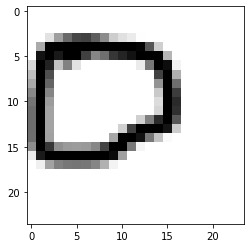

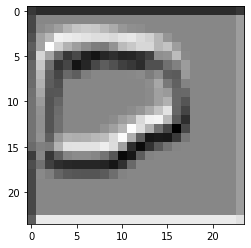

In [21]:
from keras.models import Model

layer_model = Model(inputs=model.input,
                    outputs=model.layers[0].output)
output = layer_model.predict(test_x)

plt.imshow(test_x[0,:,:,0], cmap='gray') # [데이터row, 행, 열, 채널(gray)]
plt.show()

plt.imshow(output[0,:,:,0], cmap='gray') # 5번째 필터를 적용한 0번째 이미지


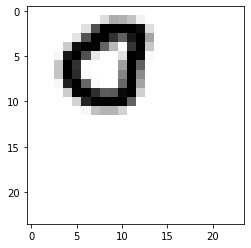

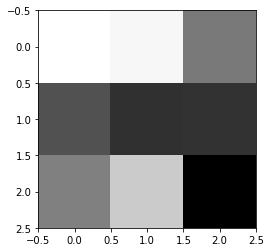

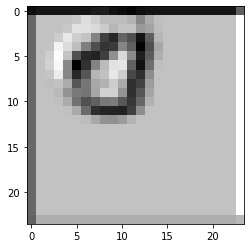

In [33]:
from keras.models import Model

# 0번 레이어를 새 모델로 생성
layer_model = Model(inputs=model.input,
                    outputs=model.layers[0].output)
output = layer_model.predict(test_x)

iFilter = 5
iImg = 1

# iImg 번 이미지
plt.imshow(test_x[iImg,:,:,0], cmap='gray')
plt.show()

# filter
filters, bias = model.layers[0].get_weights()
# filtets.shape = (3, 3, 1, 32)
# iFilter에 대한 필터
f = filters[:,:,0,iFilter]
plt.imshow(f, cmap='gray')
plt.show()

# 출력
plt.imshow(output[iImg,:,:, iFilter], cmap='gray')
plt.show()

In [24]:
layer_model = Model(inputs=model.input,
                    outputs=model.get_layer("flatten_1").output)
output = layer_model.predict(test_x)

output.shape

(15, 36864)

## 정답률 수동 계산

In [40]:
layer_model = Model(inputs=model.input,
                    outputs=model.get_layer('dense_2').output)
output = layer_model.predict(test_x)

P = np.argmax(output, axis=1)
T = np.argmax(test_y, axis=1)

print("예측 : ", P)
print("정답 : ", T)

print('정답률 : ', sum(P==T)*1 / len(P))

예측 :  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
정답 :  [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
정답률 :  0.3333333333333333
